# 🤖 Modeling: TensorFlow on Cleaned Level 3 Dirty Breast Cancer Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras import layers, models, callbacks
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

sns.set(style="whitegrid")


In [2]:
from sklearn.model_selection import StratifiedKFold


In [3]:
# ✅ Load dataset and extract features and labels as NumPy arrays
import pandas as pd

df = pd.read_csv('../data/breast_cancer_synthetic_3k_cleaned_from_L3.csv')

# Ensure X and y are NumPy arrays
X = df.drop('diagnosis', axis=1).to_numpy()
y = df['diagnosis'].to_numpy()

# Confirm types
print(f"✅ X type: {type(X)}, shape: {X.shape}")
print(f"✅ y type: {type(y)}, shape: {y.shape}")


✅ X type: <class 'numpy.ndarray'>, shape: (3285, 30)
✅ y type: <class 'numpy.ndarray'>, shape: (3285,)


In [4]:
X = df.drop(columns=["diagnosis"])
y = df["diagnosis"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

print(f"Train shape: {X_train.shape}, Test shape: {X_test.shape}")


Train shape: (2628, 30), Test shape: (657, 30)


In [5]:
model = models.Sequential([
    layers.Input(shape=(X_train.shape[1],)),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(32, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(1, activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy', tf.keras.metrics.AUC(name='auc')]
)

model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │         1,984 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,097 (16.00 KB)

 Trainable params: 4,097 (16.00 KB)

 Non-trainable params: 0 (0.00 B)

In [6]:
early_stop = callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=100,
    batch_size=32,
    callbacks=[early_stop],
    verbose=1
)


Epoch 1/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5733 - auc: 0.5800 - loss: 0.6748 - val_accuracy: 0.6122 - val_auc: 0.8415 - val_loss: 0.6541
Epoch 2/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 793us/step - accuracy: 0.6337 - auc: 0.7019 - loss: 0.6389 - val_accuracy: 0.6597 - val_auc: 0.8875 - val_loss: 0.6039
Epoch 3/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 750us/step - accuracy: 0.7079 - auc: 0.7806 - loss: 0.5864 - val_accuracy: 0.8099 - val_auc: 0.9054 - val_loss: 0.5097
Epoch 4/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 746us/step - accuracy: 0.7588 - auc: 0.8393 - loss: 0.5190 - val_accuracy: 0.8422 - val_auc: 0.9147 - val_loss: 0.4456
Epoch 5/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 735us/step - accuracy: 0.7959 - auc: 0.8763 - loss: 0.4623 - val_accuracy: 0.7605 - val_auc: 0.9175 - val_loss: 0.4686
Epoch 6/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 737us/step - accuracy: 0.8306 - auc: 0.8953 - loss: 0.4225 - val_accuracy: 0.8612 - val_auc: 0.9241 - val_loss: 0.3753
Epoch 7/100
66/66 ━━━━━━━━━━━━━━━━━━

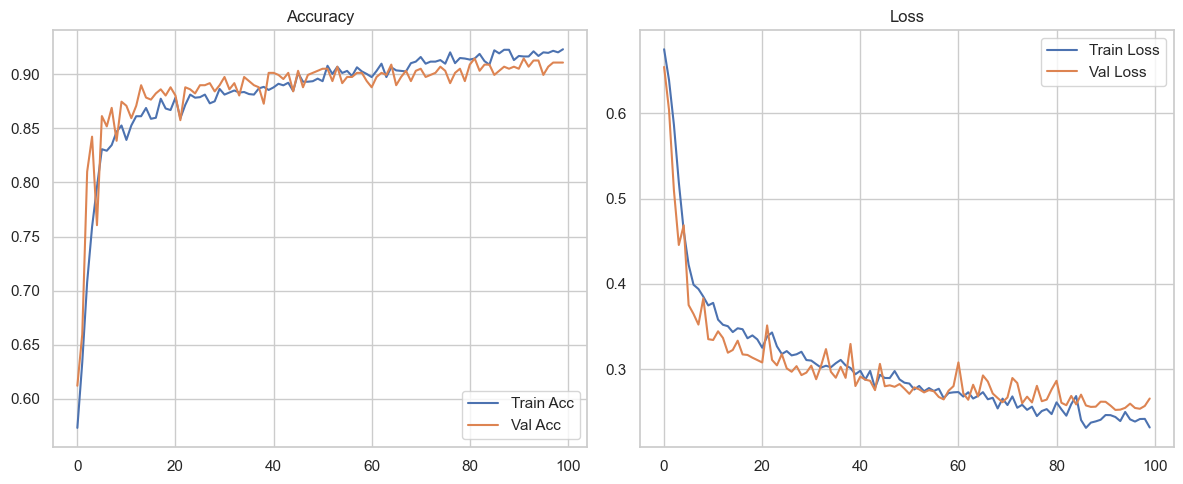

In [7]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss')
plt.legend()

plt.tight_layout()
plt.show()


In [8]:
y_pred_prob = model.predict(X_test).ravel()
y_pred = (y_pred_prob > 0.5).astype(int)

print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_pred_prob))


21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 940us/step
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.92      0.93       363
           1       0.90      0.92      0.91       294

    accuracy                           0.92       657
   macro avg       0.92      0.92      0.92       657
weighted avg       0.92      0.92      0.92       657

Confusion Matrix:
 [[333  30]
 [ 24 270]]
ROC AUC Score: 0.9560821573808587


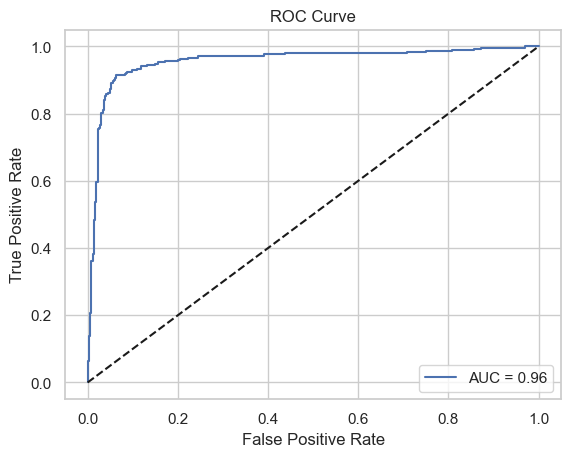

In [9]:
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
plt.figure()
plt.plot(fpr, tpr, label=f"AUC = {roc_auc_score(y_test, y_pred_prob):.2f}")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid(True)
plt.show()


In [10]:
from sklearn.model_selection import StratifiedKFold

def build_model(input_shape):
    model = tf.keras.models.Sequential([
        tf.keras.layers.Input(shape=(input_shape,)),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(32, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
all_val_acc = []

for fold, (train_idx, val_idx) in enumerate(skf.split(X, y)):
    print(f"\n📂 Fold {fold+1}")

    X_train, X_val = X.iloc[train_idx], X.iloc[val_idx]
    y_train, y_val = y[train_idx], y[val_idx]


    model = build_model(input_shape=X.shape[1])

    history = model.fit(
        X_train, y_train,
        validation_data=(X_val, y_val),
        epochs=50,
        batch_size=32,
        verbose=0
    )

    val_loss, val_acc = model.evaluate(X_val, y_val, verbose=0)
    print(f"✅ Fold {fold+1} Accuracy: {val_acc:.4f}")
    all_val_acc.append(val_acc)

print(f"\n🔚 Average Validation Accuracy: {np.mean(all_val_acc):.4f}")



📂 Fold 1
✅ Fold 1 Accuracy: 0.8539

📂 Fold 2
✅ Fold 2 Accuracy: 0.9132

📂 Fold 3
✅ Fold 3 Accuracy: 0.9132

📂 Fold 4
✅ Fold 4 Accuracy: 0.9056

📂 Fold 5
✅ Fold 5 Accuracy: 0.9056

🔚 Average Validation Accuracy: 0.8983
